Importing the Dependencies

In [ ]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions

Data Collection and Processing

In [ ]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/Thesis_ML SVA/testData.csv')
df.head()

,building_name,city,gps_coor,bldg_occupancy,no_of_storey,storey_height,tot_floor_area,bldg_type,bldg_cluster,ver_irreg,plan_irreg,const_date,soil_type,damage_grade
0,MarinaBay A,George Town,"5.443830, 100.306618",Residential,17.0,3.5,2350.0,C2,High Rise (>7),No,L-Shaped,Pre-Code,C,Grade 3
1,MarinaBay B,George Town,"5.44304, 100.30703",Residential,19.0,3.5,1385.0,C2,High Rise (>7),No,U-Shaped,Pre-Code,C,Grade 3
2,MarinaBay C,George Town,"5.44217, 100.30749",Residential,18.0,3.5,2671.0,C2,High Rise (>7),No,L-Shaped,Pre-Code,C,Grade 3
3,ShuiBeeKeong Temple,George Town,"5.44168, 100.30697",Religious,1.0,4.0,112.0,URM,Low Rise (1-3),No,No,Pre-Code,C,Grade 3
4,BgnJermal Fire Stn,George Town,"5.44139, 100.30675",Emergency Services,2.0,3.5,529.0,C3,Low Rise (1-3),No,L-Shaped,Pre-Code,C,Grade 4


In [ ]:
df.shape

(500, 14)

In [ ]:
#statistical measures
df.describe()

,no_of_storey,storey_height,tot_floor_area
count,500.000000,499.000000,499.000000
mean,2.690000,3.596393,393.186373
std,2.585977,1.465427,437.944518
min,1.000000,3.000000,25.000000
25%,2.000000,3.500000,165.000000
50%,2.000000,3.500000,275.000000
75%,3.000000,3.500000,467.500000
max,25.000000,35.000000,5355.000000


In [ ]:
#number of missing values
df.isnull().sum()

building_name     1
city              1
gps_coor          1
bldg_occupancy    0
no_of_storey      0
storey_height     1
tot_floor_area    1
bldg_type         0
bldg_cluster      1
ver_irreg         3
plan_irreg        1
const_date        1
soil_type         0
damage_grade      0
dtype: int64

In [ ]:
#drop missing values
df = df.dropna()

In [ ]:
df.isnull().sum()

building_name     0
city              0
gps_coor          0
bldg_occupancy    0
no_of_storey      0
storey_height     0
tot_floor_area    0
bldg_type         0
bldg_cluster      0
ver_irreg         0
plan_irreg        0
const_date        0
soil_type         0
damage_grade      0
dtype: int64

In [ ]:
#label encoding
df.replace({"damage_grade":{'Grade 1':1, 'Grade 2':2, 'Grade 3':3, 'Grade 4':4, 'Grade 5':5}},inplace=True)

In [ ]:
df.head()

,building_name,city,gps_coor,bldg_occupancy,no_of_storey,storey_height,tot_floor_area,bldg_type,bldg_cluster,ver_irreg,plan_irreg,const_date,soil_type,damage_grade
0,MarinaBay A,George Town,"5.443830, 100.306618",Residential,17.0,3.5,2350.0,C2,High Rise (>7),No,L-Shaped,Pre-Code,C,3
1,MarinaBay B,George Town,"5.44304, 100.30703",Residential,19.0,3.5,1385.0,C2,High Rise (>7),No,U-Shaped,Pre-Code,C,3
2,MarinaBay C,George Town,"5.44217, 100.30749",Residential,18.0,3.5,2671.0,C2,High Rise (>7),No,L-Shaped,Pre-Code,C,3
3,ShuiBeeKeong Temple,George Town,"5.44168, 100.30697",Religious,1.0,4.0,112.0,URM,Low Rise (1-3),No,No,Pre-Code,C,3
4,BgnJermal Fire Stn,George Town,"5.44139, 100.30675",Emergency Services,2.0,3.5,529.0,C3,Low Rise (1-3),No,L-Shaped,Pre-Code,C,4


Data Visualization

<Axes: xlabel='bldg_type', ylabel='count'>

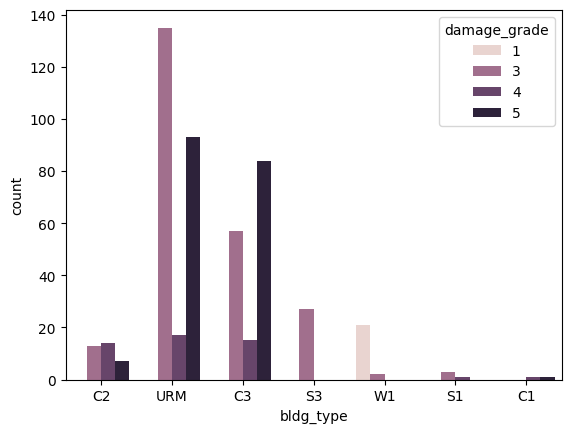

In [ ]:
#bldg_occupancy & damage grade
sns.countplot(x='bldg_type', hue='damage_grade', data=df)

<Axes: xlabel='bldg_cluster', ylabel='count'>

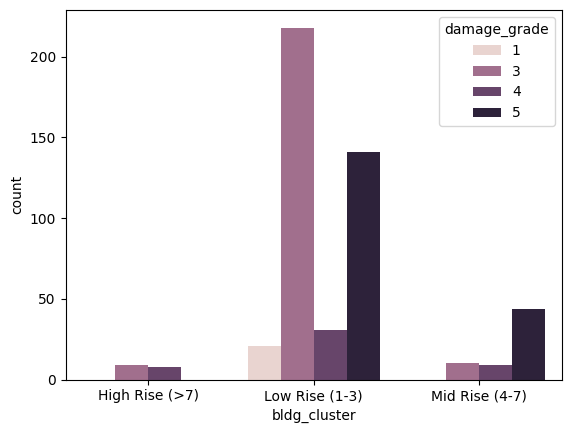

In [ ]:
#bldg_cluster & damage grade
sns.countplot(x='bldg_cluster', hue='damage_grade', data=df)

In [ ]:
#convert categorical columns to numerical values
df.replace({"bldg_type":{'W1':1, 'W2':2, 'S1':3, 'S2':4, 'S3':5, 'S4':6, 'S5':7, 'C1':8, 'C2':9, 'C3':10, 'PC1':11, 'PC2':12, 'RM1':13, 'RM2':14, 'URM':15},
            "bldg_cluster":{'Low Rise (1-3)':1, 'Mid Rise (4-7)':2, 'High Rise (>7)':3},
            "plan_irreg":{'No':0, 'L-Shaped':1, 'T-Shaped':2, 'U-Shaped':3, 'E-Shaped':4, 'Irregular':5, 'H-Shaped':5, 'I-Shaped':5, 'Other':5},
            "ver_irreg":{'No':0, 'Setbacks':1, 'Building on Hills':2, 'Soft Storey':3, 'Inclined Walls':4, 'Other':5, 'Setbacks;Soft Storey':5, 'Setbacks;Soft Storey;Inclined Walls':5, 'Setbacks;Inclined Walls':5},
            "const_date":{'Unknown':0, 'Pre-Code':1, 'Post-Benchmark':2},
            "soil_type":{'A':1, 'B':2, 'C':3, 'D':4, 'E':5}},inplace=True)

In [ ]:
df.head()

,building_name,city,gps_coor,bldg_occupancy,no_of_storey,storey_height,tot_floor_area,bldg_type,bldg_cluster,ver_irreg,plan_irreg,const_date,soil_type,damage_grade
0,MarinaBay A,George Town,"5.443830, 100.306618",Residential,17.0,3.5,2350.0,9,3,0,1,1,3,3
1,MarinaBay B,George Town,"5.44304, 100.30703",Residential,19.0,3.5,1385.0,9,3,0,3,1,3,3
2,MarinaBay C,George Town,"5.44217, 100.30749",Residential,18.0,3.5,2671.0,9,3,0,1,1,3,3
3,ShuiBeeKeong Temple,George Town,"5.44168, 100.30697",Religious,1.0,4.0,112.0,15,1,0,0,1,3,3
4,BgnJermal Fire Stn,George Town,"5.44139, 100.30675",Emergency Services,2.0,3.5,529.0,10,1,0,1,1,3,4


In [ ]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                no_of_storey  storey_height  tot_floor_area  bldg_type  \
no_of_storey        1.000000      -0.063544        0.366647   0.122123   
storey_height      -0.063544       1.000000        0.200795   0.182677   
tot_floor_area      0.366647       0.200795        1.000000   0.254030   
bldg_type           0.122123       0.182677        0.254030   1.000000   
bldg_cluster        0.790312      -0.046394        0.326988  -0.016587   
ver_irreg           0.507135      -0.036551        0.224053   0.118977   
plan_irreg          0.316651       0.080579        0.325042  -0.020948   
const_date               NaN            NaN             NaN        NaN   
soil_type                NaN            NaN             NaN        NaN   
damage_grade        0.336169       0.115635        0.316884   0.621816   

                bldg_cluster  ver_irreg  plan_irreg  const_date  soil_type  \
no_of_storey        0.790312   0.507135    0.316651         NaN        NaN   
storey_height      -0.046394 

<Axes: >

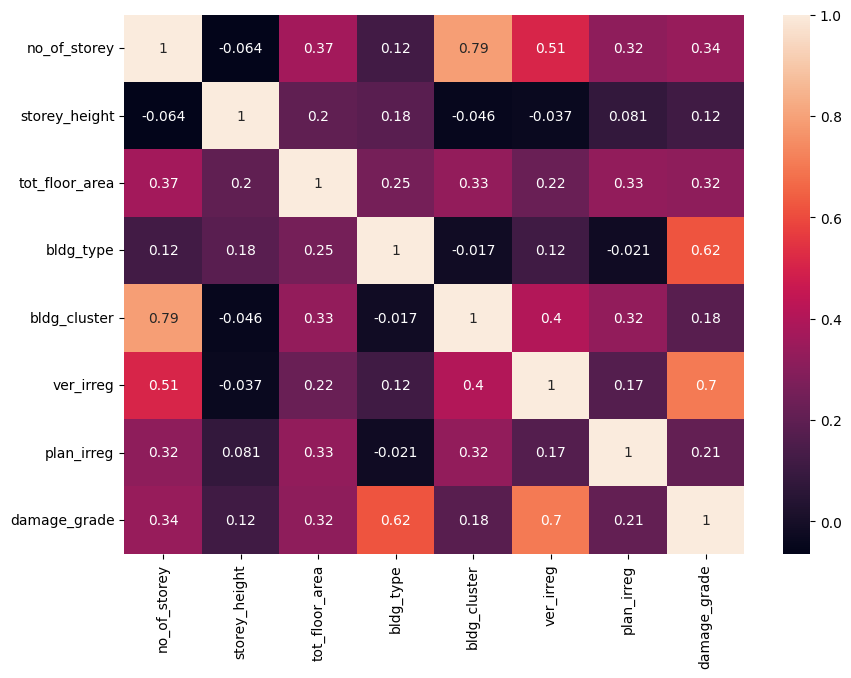

In [ ]:
#Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix.drop(['const_date', 'soil_type'],axis=0).drop(['const_date', 'soil_type'],axis=1), annot=True)

In [ ]:
df['no_of_storey'] = np.log(df['no_of_storey'] + 1)
df['storey_height'] = np.log(df['storey_height'] + 1)
df['tot_floor_area'] = np.log(df['tot_floor_area'] + 1)
df['bldg_type'] = np.log(df['bldg_type'] + 1)
df['bldg_cluster'] = np.log(df['bldg_cluster'] + 1)
df['ver_irreg'] = np.log(df['ver_irreg'] + 1)
df['plan_irreg'] = np.log(df['plan_irreg'] + 1)
df['const_date'] = np.log(df['const_date'] + 1)
df['soil_type'] = np.log(df['soil_type'] + 1)

array([[<Axes: title={'center': 'no_of_storey'}>,
        <Axes: title={'center': 'storey_height'}>,
        <Axes: title={'center': 'tot_floor_area'}>],
       [<Axes: title={'center': 'bldg_type'}>,
        <Axes: title={'center': 'bldg_cluster'}>,
        <Axes: title={'center': 'ver_irreg'}>],
       [<Axes: title={'center': 'plan_irreg'}>,
        <Axes: title={'center': 'const_date'}>,
        <Axes: title={'center': 'soil_type'}>],
       [<Axes: title={'center': 'damage_grade'}>, <Axes: >, <Axes: >]],
      dtype=object)

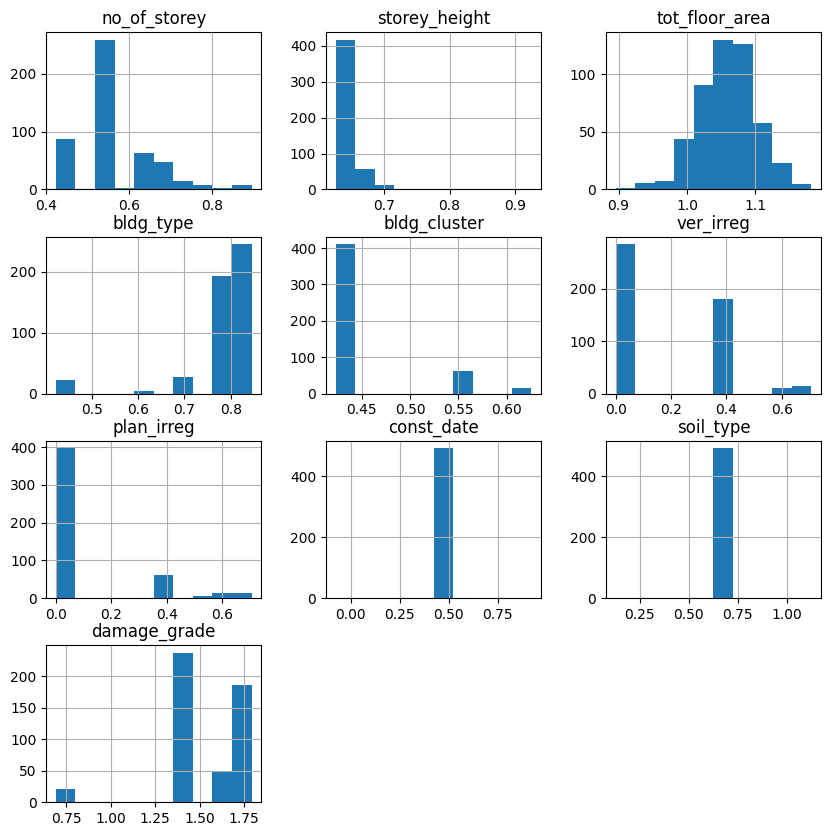

In [ ]:
df.hist(figsize=(10, 10))

In [ ]:
#separate data and label
X = df.drop(columns=['building_name', 'city', 'gps_coor', 'bldg_occupancy', 'damage_grade'],axis=1)
y = df['damage_grade']

In [ ]:
print(X)
print(y)

     no_of_storey  storey_height  tot_floor_area  bldg_type  bldg_cluster  \
0            17.0           3.50          2350.0          9             3   
1            19.0           3.50          1385.0          9             3   
2            18.0           3.50          2671.0          9             3   
3             1.0           4.00           112.0         15             1   
4             2.0           3.50           529.0         10             1   
..            ...            ...             ...        ...           ...   
495           2.0           3.50           395.0         10             1   
496           3.0           3.50           145.0         10             1   
497           2.0           3.50           100.0         10             1   
498           2.0           3.50           555.0         10             1   
499           3.0           3.15           290.0         10             1   

     ver_irreg  plan_irreg  const_date  soil_type  
0            0         

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(491, 9) (343, 9) (148, 9)


Training the ML model:

Support Vector Machine Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the SVM model
classifier.fit(X_train, y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
#accuracy score on training data
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)

In [ ]:
print('Accuracy Score on Training Data: ', training_data_accuracy)

Accuracy Score on Training Data:  0.9591836734693877


In [ ]:
#accuracy score on test data
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)

In [ ]:
print('Accuracy Score on Test Data: ', test_data_accuracy)

Accuracy Score on Test Data:  0.9121621621621622


In [ ]:
#R2 error
error_score = metrics.r2_score(y_test, X_test_pred)
print('R-squared Error: ', error_score)

R-squared Error:  0.8214716525934861


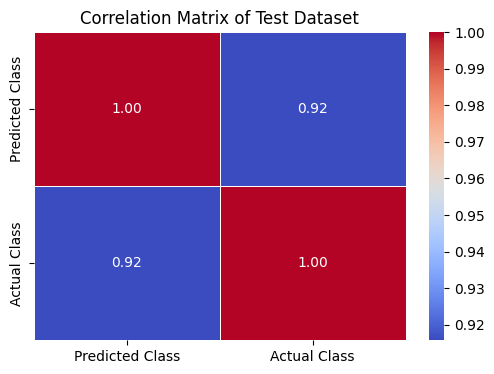

In [ ]:
# Generate sample data (replace this with your actual data)
predicted_classes = X_test_pred
actual_classes = y_test

# Create a DataFrame
df_corr = pd.DataFrame({'Predicted Class': predicted_classes, 'Actual Class': actual_classes})

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Test Dataset')
plt.show()

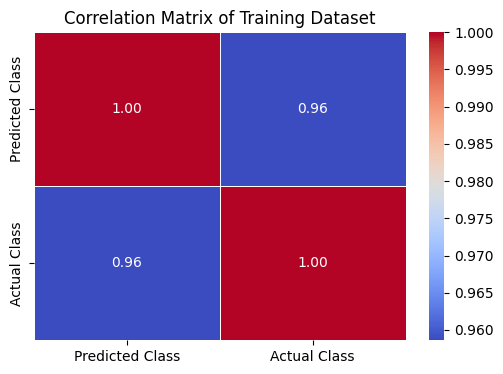

In [ ]:
# Generate sample data (replace this with your actual data)
predicted_train_classes = X_train_pred
actual_train_classes = y_train

# Create a DataFrame
df_corr_train = pd.DataFrame({'Predicted Class': predicted_train_classes, 'Actual Class': actual_train_classes})

# Calculate the correlation matrix
correlation_matrix_train = df_corr_train.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Training Dataset')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8);
# Constructing a hyperplane using a formula.
w = svc_model.coef_[0]           # w consists of 2 elements
b = svc_model.intercept_[0]      # b consists of 1 element
x_points = np.linspace(-1, 1)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
plt.plot(x_points, y_points, c='r');

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 1000x800 with 0 Axes>

Making a Predictive System

In [ ]:
X_new = pd.read_csv('/content/drive/MyDrive/Thesis_ML SVA/predictData_clean.csv')

#X_new_as_nparray = np.asarray(X_new)

#X_new_reshaped = X_new_as_nparray.reshape(1,-1)

prediction = classifier.predict(X_new)
print(prediction)

[5 4 3 4 3 3 4 3 3 3 4]


In [ ]:
# Your data tuple
X_new = pd.read_csv('/content/drive/MyDrive/Thesis_ML SVA/predictData_clean.csv')

# Convert the tuple to a numpy array
#X_new_as_nparray = X_new.to_numpy()

#X_new_reshaped = X_new_as_nparray.reshape(1,-1)

prediction = classifier.predict(X_new)

X_new['damage_grade_pred'] = prediction
X_new.to_csv('dmg_grade_pred.csv', index=False)

In [ ]:
X_new.head()

,no_of_storey,storey_height,tot_floor_area,bldg_type,bldg_cluster,ver_irreg,plan_irreg,const_date,soil_type,damage_grade_pred
0,5,3.2,1114.96,9,2,1,0,0,4,5
1,3,3.2,2466.72,8,1,0,3,0,4,4
2,4,3.2,445.65,8,2,0,0,0,4,3
3,4,3.2,1303.84,8,2,0,1,0,4,4
4,3,3.2,850.48,8,1,0,0,0,4,3


In [ ]:
prediction

array([5, 4, 3, 4, 3, 3, 3, 3, 3, 3, 4])

In [ ]:
#X_new['damage_grade_pred'] = prediction
#X_new.to_csv('dmg_grade_pred.csv', index=False)

In [ ]:
X_new

,no_of_storey,storey_height,tot_floor_area,bldg_type,bldg_cluster,ver_irreg,plan_irreg,const_date,soil_type,damage_grade_pred
0,5,3.2,1114.96,9,2,1,0,0,4,5
1,3,3.2,2466.72,8,1,0,3,0,4,4
2,4,3.2,445.65,8,2,0,0,0,4,3
3,4,3.2,1303.84,8,2,0,1,0,4,4
4,3,3.2,850.48,8,1,0,0,0,4,3
5,4,3.2,3038.04,8,2,0,0,0,4,3
6,5,3.2,833.38,8,2,0,1,0,4,4
7,3,3.2,1201.92,8,1,0,0,0,4,3
8,5,3.2,1386.99,8,2,0,0,0,4,3
9,3,3.2,1068.47,8,1,0,0,0,4,3


In [ ]:
X_new.describe()

,no_of_storey,storey_height,tot_floor_area,bldg_type,bldg_cluster,ver_irreg,plan_irreg,const_date,soil_type,damage_grade_pred
count,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.0,11.000000
mean,4.000000,3.2,1358.105455,8.181818,1.636364,0.090909,0.727273,0.0,4.0,3.545455
std,0.894427,0.0,748.647193,0.404520,0.504525,0.301511,1.190874,0.0,0.0,0.687552
min,3.000000,3.2,445.650000,8.000000,1.000000,0.000000,0.000000,0.0,4.0,3.000000
25%,3.000000,3.2,959.475000,8.000000,1.000000,0.000000,0.000000,0.0,4.0,3.000000
50%,4.000000,3.2,1201.920000,8.000000,2.000000,0.000000,0.000000,0.0,4.0,3.000000
75%,5.000000,3.2,1345.415000,8.000000,2.000000,0.000000,1.000000,0.0,4.0,4.000000
max,5.000000,3.2,3038.040000,9.000000,2.000000,1.000000,3.000000,0.0,4.0,5.000000


<Axes: xlabel='bldg_type', ylabel='count'>

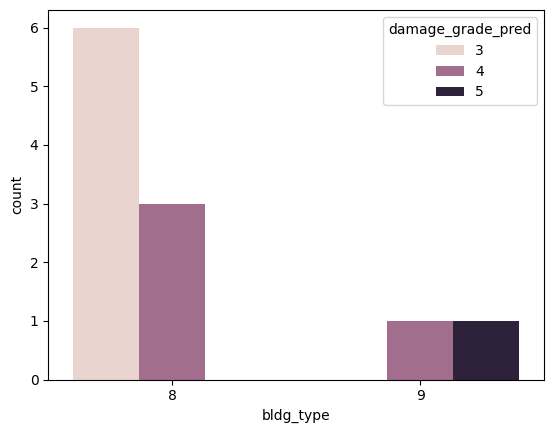

In [ ]:
sns.countplot(x='bldg_type', hue='damage_grade_pred', data=X_new)

<Axes: xlabel='storey_height', ylabel='count'>

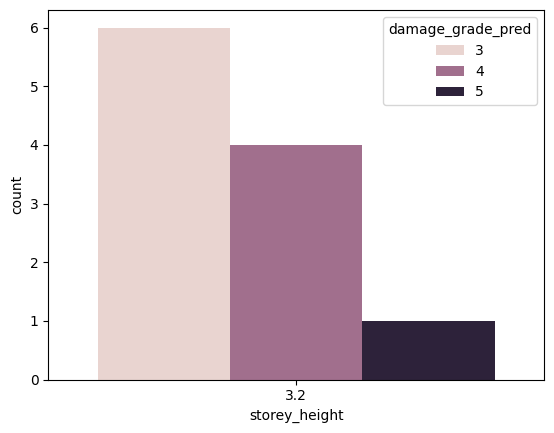

In [ ]:
sns.countplot(x='storey_height', hue='damage_grade_pred', data=X_new)

<Axes: xlabel='no_of_storey', ylabel='count'>

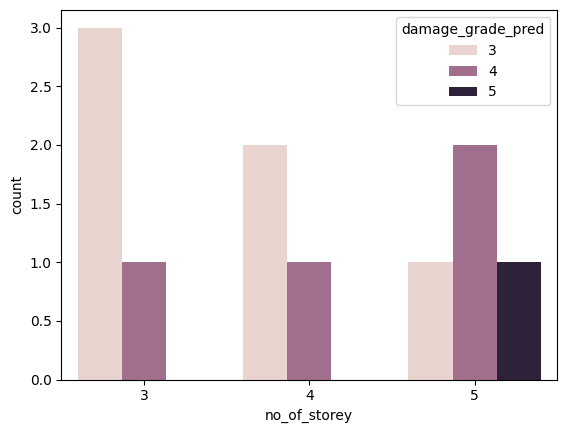

In [ ]:
sns.countplot(x='no_of_storey', hue='damage_grade_pred', data=X_new)